# Uber Rides Data Analysis


Suppose you work as a Data Analyst at Uber; You need to provide answers to all the questions given below to the company.

1. In which category do people book the Uber rides most?
2. For which purpose do people book the Uber rides most?
3. At what time people books cabs the most from Uber?
4. In which months do people book Uber rides less frequently?
5. On which days of the week do people book Uber rides the  most?
6. How many miles do people ussually book a cab for through Uber?

In [2]:
import pandas as pd

In [4]:
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
dataset =    pd.read_csv("UberDataset.csv")

In [4]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
dataset.shape

(1156, 7)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [11]:
dataset.isna().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [17]:
dataset.loc[dataset.isnull().any(axis=1)]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
32,1/19/2016 9:09,1/19/2016 9:23,Business,Whitebridge,Lake Wellingborough,7.2,NaN
85,02-09-2016 10:54,02-09-2016 11:07,Personal,Whitebridge,Northwoods,5.3,NaN
86,02-09-2016 11:43,02-09-2016 11:50,Personal,Northwoods,Tanglewood,3.0,NaN
87,02-09-2016 13:36,02-09-2016 13:52,Personal,Tanglewood,Preston,5.1,NaN
...,...,...,...,...,...,...,...
1066,12/19/2016 14:37,12/19/2016 14:50,Business,Unknown Location,Unknown Location,5.4,NaN
1069,12/19/2016 19:05,12/19/2016 19:17,Business,Islamabad,Unknown Location,2.2,NaN
1071,12/20/2016 8:49,12/20/2016 9:24,Business,Unknown Location,Rawalpindi,12.0,NaN
1143,12/29/2016 20:53,12/29/2016 21:42,Business,Kar?chi,Unknown Location,6.4,NaN


# Data Preprocessing

In [18]:
dataset.dropna(subset=['END_DATE','CATEGORY','START','STOP'], inplace=True)

In [19]:
dataset.isna().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [20]:
dataset.fillna({'PURPOSE':"Not Specified"} ,inplace=True)

In [21]:
dataset.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [22]:
dataset.shape

(1155, 7)

In [22]:
dataset[dataset.duplicated()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


In [25]:
dataset.drop_duplicates(inplace=True)

In [26]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Not Specified
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
# dataset['START_DATE']    =    pd.to_datetime(dataset['START_DATE'],    errors =    'coerce') 
# dataset['END_DATE']    =    pd.to_datetime(dataset['END_DATE'],    errors =    'coerce')
dataset['START_DATE']    =    pd.to_datetime(dataset['START_DATE']) 
dataset['END_DATE']    =    pd.to_datetime(dataset['END_DATE'])

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1154 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1154 non-null   datetime64[ns]
 1   END_DATE    1154 non-null   datetime64[ns]
 2   CATEGORY    1154 non-null   object        
 3   START       1154 non-null   object        
 4   STOP        1154 non-null   object        
 5   MILES       1154 non-null   float64       
 6   PURPOSE     1154 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.1+ KB


In [31]:

dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date 
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

In [20]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14


In [32]:
dataset['day-night']=pd.cut(x=dataset['time'],bins=[0,12,15,19,24],labels=['Morning','Afternoon','Evening','Night'],right=False)

In [33]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Specified,2016-01-02,1,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,Afternoon


In [34]:
dataset.shape

(1154, 10)

In [35]:
dataset.isna().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
date          0
time          0
day-night     0
dtype: int64

In [36]:
dataset.to_csv("cleaned_uber_dataset(1).csv",index=False)

Data Visualizations

<Axes: xlabel='count', ylabel='PURPOSE'>

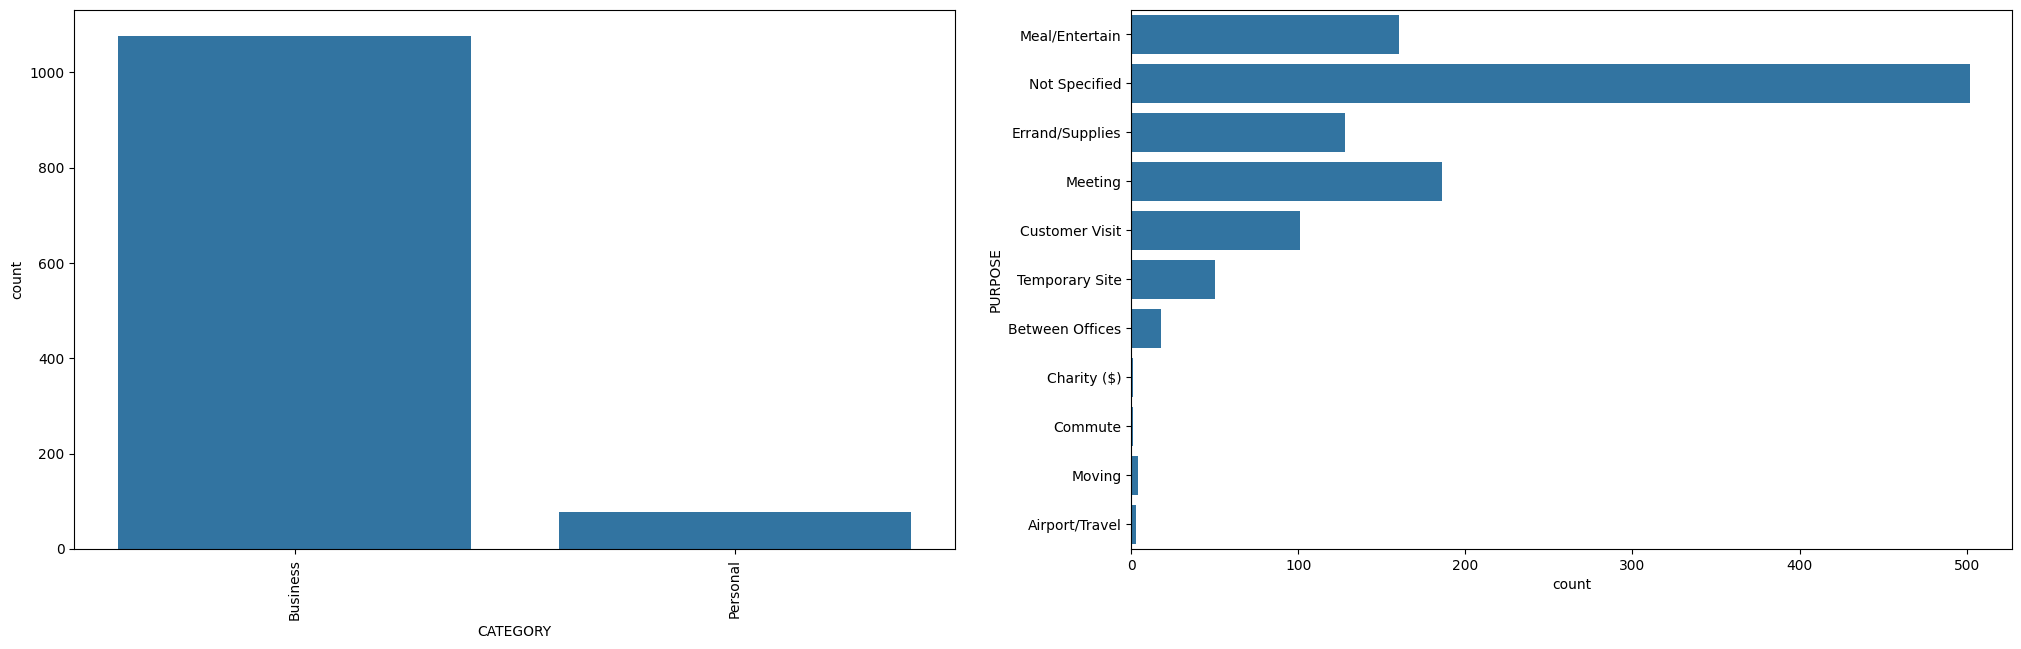

In [ ]:
plt.figure(figsize =(25,7)) 
plt.subplot(1,2,1)
sns.countplot(x=dataset['CATEGORY'])
plt.xticks(rotation =90)
plt.subplot(1,2,2)
sns.countplot(y=dataset['PURPOSE'])
# purpose=dataset['PURPOSE'].value_counts()
# sns.barplot(y=purpose.index,x=purpose)

<Axes: xlabel='day-night', ylabel='count'>

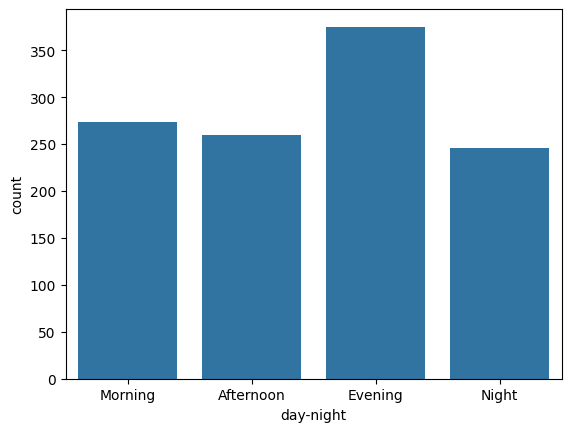

In [55]:
sns.countplot(x=dataset['day-night'])

In [41]:
dataset['MONTH']  =  pd.DatetimeIndex(dataset['START_DATE']).month

In [42]:
dataset['MONTH']  =  pd.DatetimeIndex(dataset['START_DATE']).month

month_label =   {1.0:'Jan', 2.0:'Feb',3.0 :'Mar', 4.0:'April',
5.0:  'May',  6.0: 'June', 7.0: 'July',  8.0:  'Aug',
9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}

dataset['MONTH']=dataset['MONTH'].map(month_label)

In [59]:
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Specified,2016-01-02,1,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,Afternoon,Jan
...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,2016-12-31,1,Morning,Dec
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,2016-12-31,13,Afternoon,Dec
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,2016-12-31,15,Evening,Dec
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,2016-12-31,21,Night,Dec


In [60]:
rides = dataset['MONTH'].value_counts(sort=False)
rides
#plt.plot(mon.index,mon.values)

Jan       61
Feb      115
Mar      113
April     54
May       49
June     107
July     112
Aug      133
Sep       36
Oct      106
Nov      122
Dec      146
Name: MONTH, dtype: int64

In [61]:
max_miles=dataset.groupby('MONTH')['MILES'].max()
max_miles

MONTH
April    174.2
Aug      156.9
Dec      103.0
Feb       43.7
Jan       63.7
July     195.3
June      46.9
Mar      310.3
May       25.6
Nov       45.9
Oct      195.9
Sep      195.6
Name: MILES, dtype: float64

In [66]:
df =    pd.DataFrame({
"No. of rides":  rides,
"Max miles":   max_miles   
})
df

,No. of rides,Max miles
April,54,174.2
Aug,133,156.9
Dec,146,103.0
Feb,115,43.7
Jan,61,63.7
July,112,195.3
June,107,46.9
Mar,113,310.3
May,49,25.6
Nov,122,45.9


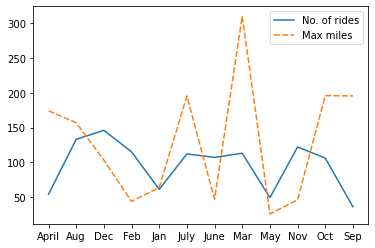

In [ ]:
p =  sns.lineplot(data=df)   

In [83]:


dataset['WEEKDAY'] = pd.DatetimeIndex(dataset['START_DATE']).weekday
day_label =    {0: 'Mon', 1:'Tues', 2:'Wed',3:'Thur',4:'Fri', 5:'Sat', 6:'Sun'} 
dataset['DAY']    =    dataset['WEEKDAY'].map(day_label)

In [ ]:
# dataset['WEEKDAY']    = dataset['START_DATE'].dt.weekday 
# day_label =    {0: 'Mon', 1:'Tues', 2:'Wed',3:'Thur',4:'Fri', 5:'Sat', 6:'Sun'} 
# dataset['DAY']    =    dataset['WEEKDAY'].map(day_label)

In [85]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,Night,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Specified,2016-01-02,1,Morning,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,Night,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,Evening,Jan,Tues
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,Afternoon,Jan,Wed


<Axes: xlabel='DAY', ylabel='count'>

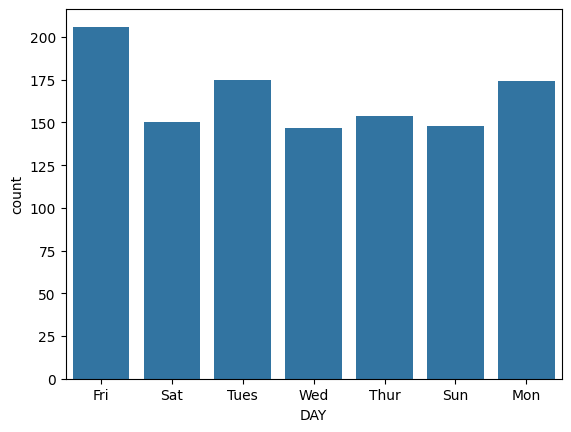

In [78]:
sns.countplot(x=dataset['DAY'])

#inorder to get sorted bar plots lets go with finding value counts of DAY column and then barplot on it.

In [79]:
day_label =dataset['DAY'].value_counts()

In [80]:
day_label

DAY
Fri     206
Tues    175
Mon     174
Thur    154
Sat     150
Sun     148
Wed     147
Name: count, dtype: int64

Text(0, 0.5, 'COUNT')

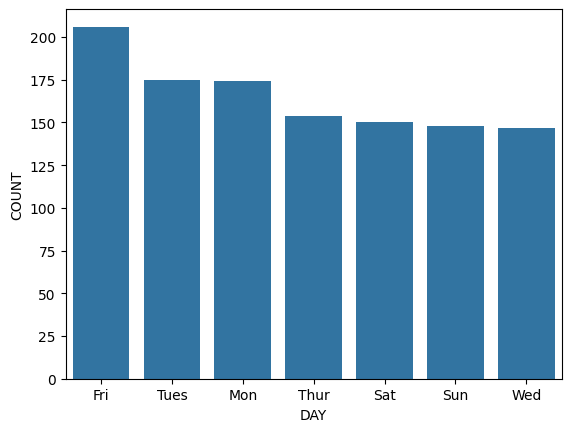

In [81]:
sns.barplot(x=day_label.index, y= day_label) 
plt.xlabel('DAY')
plt.ylabel('COUNT')

In [ ]:
#sns.countplot(dataset['DAY'])

In [86]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,Night,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Specified,2016-01-02,1,Morning,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,Night,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,Evening,Jan,Tues
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,Afternoon,Jan,Wed


<AxesSubplot:ylabel='MILES'>

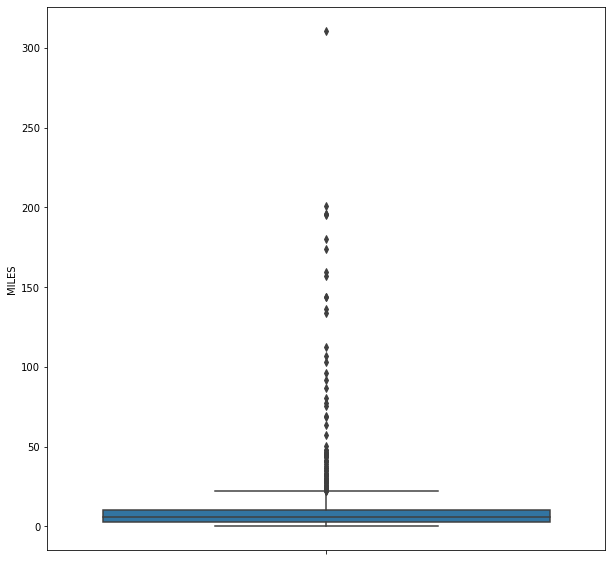

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(y=dataset['MILES'])

In [77]:
dataset[dataset['MILES']<100]['MILES']

0        5.1
1        5.0
2        4.8
3        4.7
4       63.7
        ... 
1150     0.7
1151     3.9
1152    16.2
1153     6.4
1154    48.2
Name: MILES, Length: 1138, dtype: float64

<AxesSubplot:ylabel='MILES'>

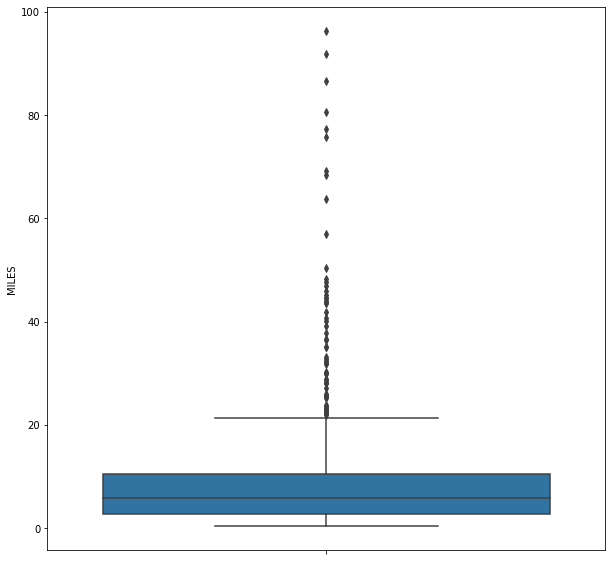

In [150]:
plt.figure(figsize=(10,10))
sns.boxplot(y=dataset[dataset['MILES']<100]['MILES'])

<AxesSubplot:ylabel='MILES'>

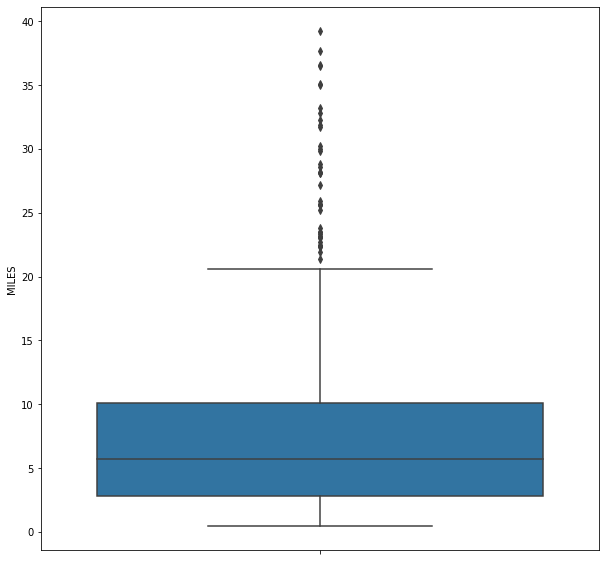

In [149]:
plt.figure(figsize=(10,10))
sns.boxplot(y=dataset[dataset['MILES']<40]['MILES'])

<Axes: xlabel='MILES', ylabel='Count'>

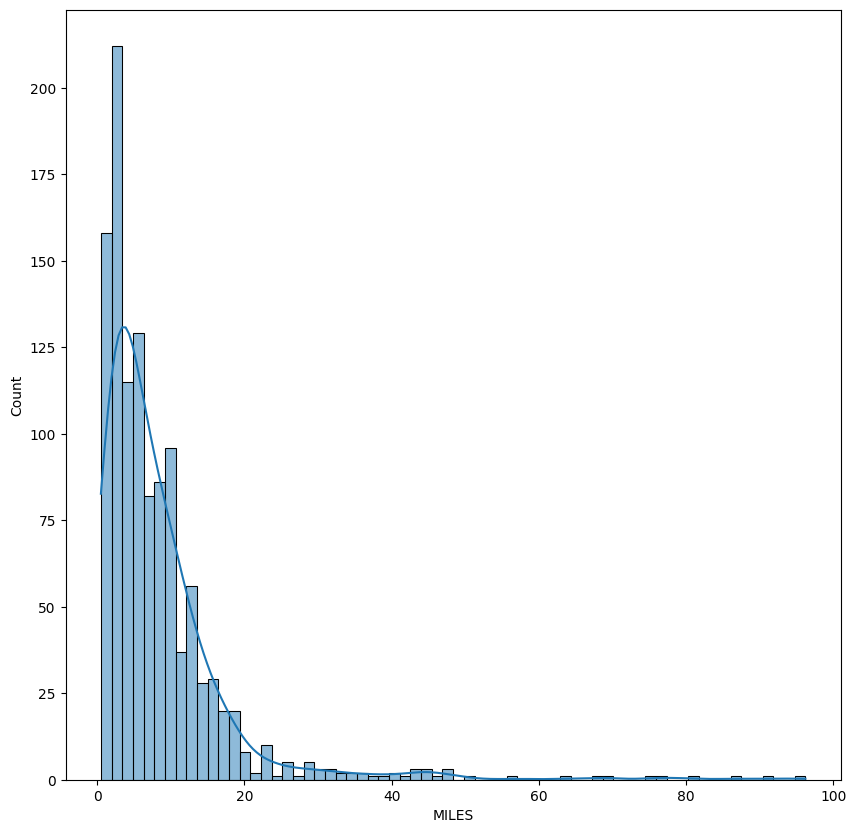

In [88]:
plt.figure(figsize=(10,10))
sns.histplot(dataset[dataset['MILES']<100]['MILES'],kde=True)

## Project Overview
This project analyzes Uber rides data to provide insights into customer booking behavior. The dataset contains **1156 rows and 7 columns**, with some missing values. 